In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\Radha-Madhav\Downloads/adult.csv')
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
print(df.shape)
print("row ->",df.shape[0])
print("column ->",df.shape[1])


(48842, 15)
row -> 48842
column -> 15


In [16]:

# Discover and Handle missing values.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
# Missing Values
for i,j in zip(df.columns,(df.values.astype(str) == '?').sum(axis = 0)):
    if j > 0:
        print(str(i) + ': ' + str(j) + ' records')


workclass: 2799 records
occupation: 2809 records
native-country: 857 records


In [5]:
# Remove missing values
df.dropna()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [12]:
# Also remove the ‘fnlwgt’ column because we don’t need that
df.drop(['fnlwgt'], axis=1)


,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [13]:
# Univariate Analysis
df.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

Text(0.5,0.98,'PDF to AGE')

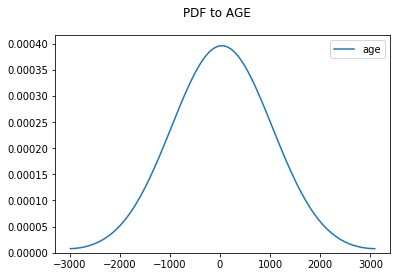

In [21]:
#PDF
ax = sns.kdeplot(df['age'],bw=1000)
ax.figure.suptitle("PDF to AGE")


Text(0.5,0.98,'Capital Gain')

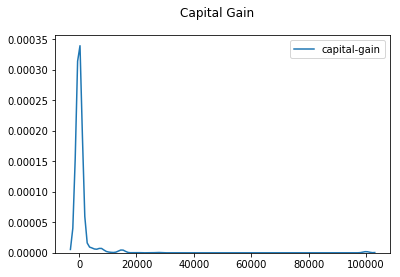

In [14]:
# pdf of capital-gain

ax=sns.kdeplot(df['capital-gain'],bw=1000)
ax.figure.suptitle("Capital Gain")


Text(0.5,0.98,'Capital Loss')

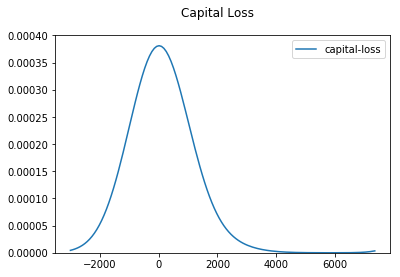

In [15]:
# pdf of capital-loss

ax=sns.kdeplot(df['capital-loss'],bw=1000)
ax.figure.suptitle("Capital Loss")


C:\Users\Radha-Madhav\Anaconda3\Anaconda Lab\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0.98,'Age')

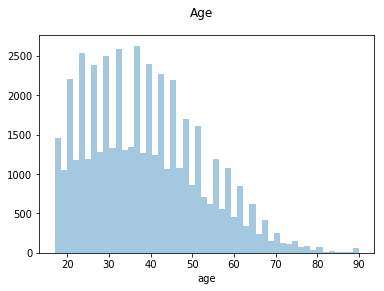

In [16]:
# Histograms
# for age
by=sns.distplot(df['age'],hist=True,kde=False)
by.figure.suptitle("Age")


C:\Users\Radha-Madhav\Anaconda3\Anaconda Lab\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0.98,'capital-gain')

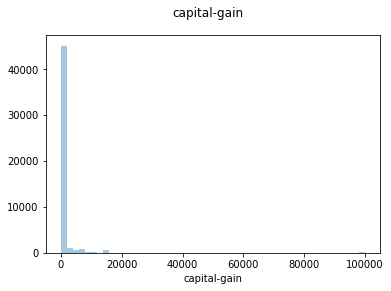

In [25]:
#Capital Gain
by=sns.distplot(df['capital-gain'],hist=True,kde=False)
by.figure.suptitle("capital-gain")


C:\Users\Radha-Madhav\Anaconda3\Anaconda Lab\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0.98,'educational-num')

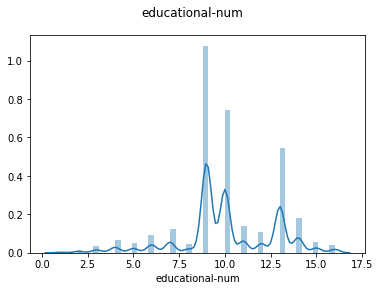

In [26]:
# Educational Num
by=sns.distplot(df['educational-num'],hist=True)
by.figure.suptitle("educational-num")


C:\Users\Radha-Madhav\Anaconda3\Anaconda Lab\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0.98,'hours-per-week')

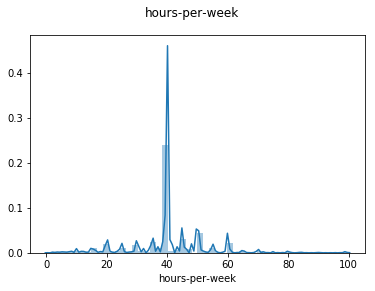

In [27]:
#Hours per week
by=sns.distplot(df['hours-per-week'],hist=True)
by.figure.suptitle("hours-per-week")


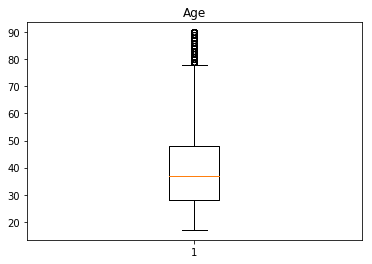

In [28]:
#Boxplot for Age

plt.title('Age')
plt.boxplot(df['age'])
plt.show()


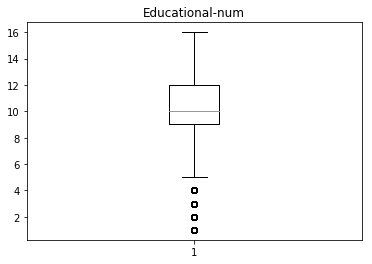

In [29]:
#Boxplot for educationalnum

plt.title('Educational-num')
plt.boxplot(df['educational-num'])
plt.show()


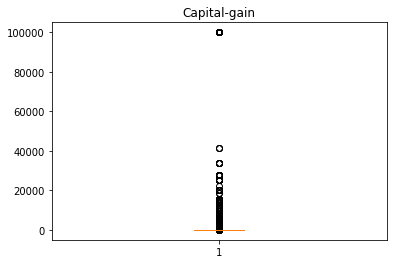

In [30]:
# Boxplot capital-gain

plt.title('Capital-gain')
plt.boxplot(df['capital-gain'])
plt.show()


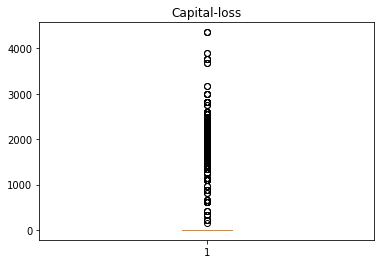

In [31]:
#capital-loss

plt.title('Capital-loss')
plt.boxplot(df['capital-loss'])
plt.show()


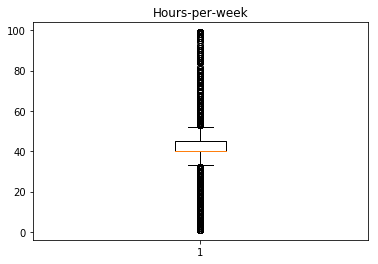

In [32]:
#Boxplot of hours perweek

plt.title('Hours-per-week')
plt.boxplot(df['hours-per-week'])
plt.show()


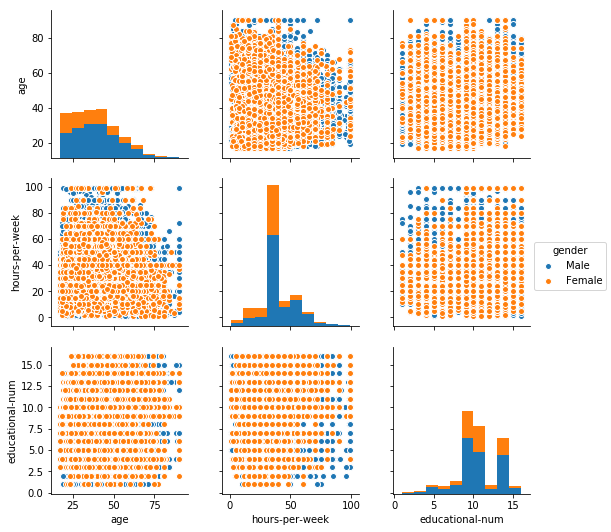

In [33]:
# Bivariate Analysis
sns.pairplot(df, vars=['age', 'hours-per-week','educational-num'],hue='gender')


Text(0,0.5,'Proportion of population')

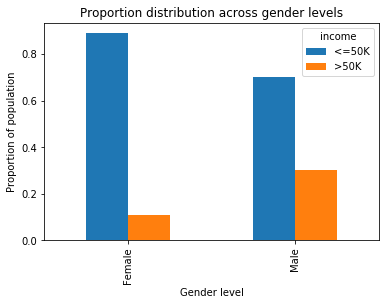

In [34]:
gender = round(pd.crosstab(df.gender, df.income).div(pd.crosstab(df.gender, df.income).apply(sum,1),0),2)
gender.sort_values(by = '>50K', inplace = True)
ax = gender.plot(kind ='bar', title = 'Proportion distribution across gender levels')
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')


Text(17.2,0.5,'Proportion of population')

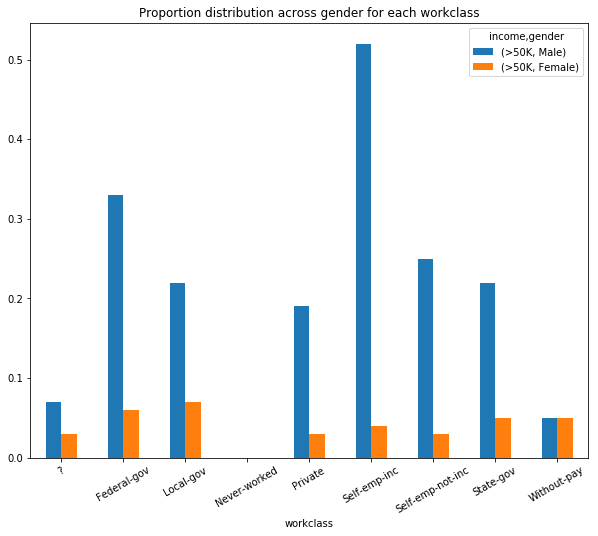

In [35]:
gender_workclass = round(pd.crosstab(df.workclass, [df.income, df.gender]).div(pd.crosstab(df.workclass, [df.income, df.gender]).apply(sum,1),0),2)
gender_workclass[[('>50K','Male'), ('>50K','Female')]].plot(kind = 'bar', title = 'Proportion distribution across gender for each workclass', figsize = (10,8), rot = 30)
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')


Occupation vs Income


Text(0,0.5,'Proportion of population')

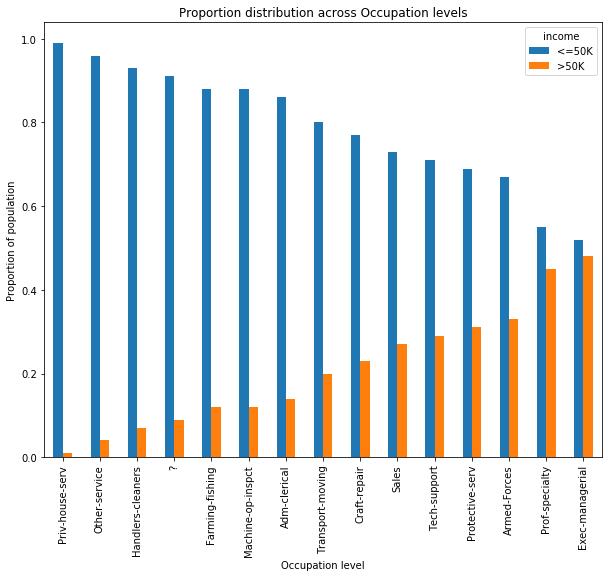

In [36]:
print('Occupation vs Income')
occupation = round(pd.crosstab(df.occupation, df.income).div(pd.crosstab(df.occupation, df.income).apply(sum,1),0),2)
occupation.sort_values(by = '>50K', inplace = True)
ax = occupation.plot(kind ='bar', title = 'Proportion distribution across Occupation levels', figsize = (10,8))
ax.set_xlabel('Occupation level')
ax.set_ylabel('Proportion of population')


Hours per week vs Income


Text(0,0.5,'Proportion of population')

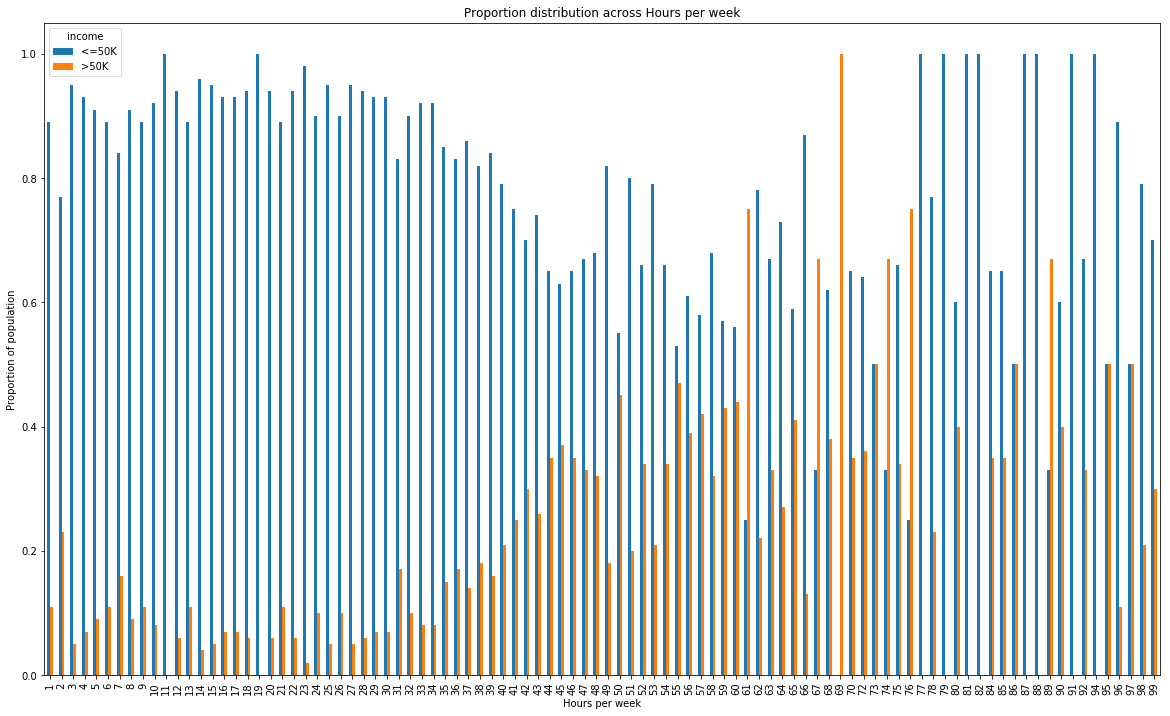

In [37]:
print('Hours per week vs Income')

hours_per_week = round(pd.crosstab(df['hours-per-week'], df.income).div(pd.crosstab(df['hours-per-week'], df.income).apply(sum,1),0),2)
# hours_per_week.sort_values(by = '>50K', inplace = True)
ax = hours_per_week.plot(kind ='bar', title = 'Proportion distribution across Hours per week', figsize = (20,12))
ax.set_xlabel('Hours per week')
ax.set_ylabel('Proportion of population')


In [38]:
# For numerical
from sklearn.preprocessing import MinMaxScaler
# Age
scale = MinMaxScaler(feature_range=(-5,5))
scale.fit_transform(df.age.values.reshape(-1, 1))


C:\Users\Radha-Madhav\Anaconda3\Anaconda Lab\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-3.90410959],
       [-2.12328767],
       [-3.49315068],
       ...,
       [ 0.61643836],
       [-4.31506849],
       [-0.20547945]])

In [39]:

# Hours-per-week
scale = MinMaxScaler(feature_range=(-4,4))
scale.fit_transform(df['hours-per-week'].values.reshape(-1, 1))

C:\Users\Radha-Madhav\Anaconda3\Anaconda Lab\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.81632653],
       [ 0.        ],
       [-0.81632653],
       ...,
       [-0.81632653],
       [-2.44897959],
       [-0.81632653]])

In [40]:
#  Capital-gain

scale = MinMaxScaler(feature_range=(-2,2))
scale.fit_transform(df['capital-gain'].values.reshape(-1, 1))


C:\Users\Radha-Madhav\Anaconda3\Anaconda Lab\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-2.        ],
       [-2.        ],
       [-2.        ],
       ...,
       [-2.        ],
       [-2.        ],
       [-1.39903399]])

In [41]:
# Capital-loss
scale = MinMaxScaler(feature_range=(-4,4))
scale.fit_transform(df['capital-loss'].values.reshape(-1, 1))


C:\Users\Radha-Madhav\Anaconda3\Anaconda Lab\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-4.],
       [-4.],
       [-4.],
       ...,
       [-4.],
       [-4.],
       [-4.]])

In [42]:
# Gender
pd.get_dummies(df['gender'], dummy_na=True)


,Female,Male,nan
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,1,0,0
5,0,1,0
6,0,1,0
7,0,1,0
8,1,0,0
9,0,1,0


In [43]:
pd.get_dummies(df['race'], dummy_na=True)


,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,nan
0,0,0,1,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,0,0,1,0
5,0,0,0,0,1,0
6,0,0,1,0,0,0
7,0,0,0,0,1,0
8,0,0,0,0,1,0
9,0,0,0,0,1,0


In [44]:
# Native Country
pd.get_dummies(df['native-country'], dummy_na=True)


,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [45]:
# Occupation
pd.get_dummies(df['occupation'], dummy_na=True)


,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,nan
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
# Marital status
pd.get_dummies(df['marital-status'], dummy_na=True)


,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,nan
0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0
5,0,0,0,0,1,0,0,0
6,0,0,0,0,1,0,0,0
7,0,0,1,0,0,0,0,0
8,0,0,0,0,1,0,0,0
9,0,0,1,0,0,0,0,0


In [47]:
# Relationship
pd.get_dummies(df['relationship'], dummy_na=True)


,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,nan
0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0
5,0,1,0,0,0,0,0
6,0,0,0,0,1,0,0
7,1,0,0,0,0,0,0
8,0,0,0,0,1,0,0
9,1,0,0,0,0,0,0


In [48]:
#Income
pd.get_dummies(df['income'], dummy_na=True)


,<=50K,>50K,nan
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0
5,1,0,0
6,1,0,0
7,0,1,0
8,1,0,0
9,1,0,0


In [49]:
# Education
pd.get_dummies(df['education'], dummy_na=True)


,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,nan
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
